In [44]:
import pandas as pd
import numpy as np 
import scipy.stats as sts
import seaborn as sns 
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import statsmodels as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("ad data.csv")
df

Age  Gender  Education  Introversion Score  Sensing Score  \
0       19.0    Male          0             9.47080       7.141434   
1       27.0  Female          0             5.85392       6.160195   
2       21.0  Female          0             7.08615       3.388433   
3       28.0    Male          0             2.01892       4.823624   
4       36.0  Female          1             9.91703       4.755080   
...      ...     ...        ...                 ...            ...   
128056  27.0    Male          0             5.11456       7.764336   
128057  19.0    Male          0             3.00078       2.525392   
128058  26.0  Female          1             8.16219       3.433857   
128059  24.0    Male          0             9.37782       5.077443   
128060  27.0    Male          0             7.78827       4.770737   

        Thinking Score  Judging Score    Interest Personality  
0              6.03696       4.360278     Unknown        ENFP  
1              0.80552       4.221421      Sports        ESFP  
2              2.66188       5.127320     Unknown        ENFP  
3              7.30625       5.986550      Others        INTP  
4              5.31469       4.677213  Technology        ENFP  
...                ...            ...         ...         ...  
128056         5.72341       2.686904        Arts        ESTP  
128057         4.71081       3.657814     Unknown        INFP  
128058         2.45531       5.541144        Arts        ENFP  
128059         1.79598       6.762643     Unknown        ENFJ  
128060         3.18600       6.204355      Others        ENFJ  

[128061 rows x 9 columns]

# –°–±–æ—Ä –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö, —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

#### –°–∫–æ–ª—å–∫–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤?

In [2]:
df.shape

(128061, 9)

–ü—Ä–∏ –ø–µ—Ä–≤–∏—á–Ω–æ–º –æ—Å–º–æ—Ç—Ä–µ –¥–∞–Ω–Ω—ã—Ö –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ 128061 —Å—Ç—Ä–æ–∫–∏ –∏ 9 —Å—Ç–æ–ª–±—Ü–æ–≤

#### –û–ø–∏—à–∏—Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ. –ö–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–µ?

In [3]:
df.dtypes

Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object

–û–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

**Age** - –≤–æ–∑—Ä–∞—Å—Ç –æ–ø—Ä–æ—à–µ–Ω–Ω–æ–≥–æ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π)

**Gender** - –ø–æ–ª –æ–ø—Ä–æ—à–µ–Ω–Ω–æ–≥–æ (–Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–π)

**Education** - –±–∏–Ω–∞—Ä–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è: –≤—ã—Å—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–ª–∏ –≤—ã—à–µ (1); –Ω–µ–ø–æ–ª–Ω–æ–µ –≤—ã—Å—à–µ–µ –∏–ª–∏ –Ω–∏–∂–µ (0) (–Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–π)

**Introversion Score** - –ù–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –æ—Ç 0 –¥–æ 10, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∞—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –æ–ø—Ä–æ—à–µ–Ω–Ω–æ–≥–æ –∫ –∏–Ω—Ç—Ä–æ–≤–µ—Ä—Å–∏–∏ –ø—Ä–æ—Ç–∏–≤ —ç–∫—Å—Ç—Ä–∞–≤–µ—Ä—Å–∏–∏. –ë–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –æ—Ü–µ–Ω–∫–∏ —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –±–æ–ª—å—à—É—é —Å–∫–ª–æ–Ω–Ω–æ—Å—Ç—å –∫ —ç–∫—Å—Ç—Ä–∞–≤–µ—Ä—Å–∏–∏ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π)

**Sensing Score** - –ù–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –æ—Ç 0 –¥–æ 10, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∞—è –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –æ–ø—Ä–æ—à–µ–Ω–Ω–æ–≥–æ –∫ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–º —Ä–µ—à–µ–Ω–∏—è–º –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –∏–Ω—Ç—É–∏—Ü–∏–µ–π. –ë–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –æ—Ü–µ–Ω–∫–∏ —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –∞–Ω–∞–ª–∏—Ç–∏–∫–∏. (–∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π)

**Thinking Score** - –ù–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –æ—Ç 0 –¥–æ 10, —É–∫–∞–∑—ã–≤–∞—é—â–∞—è –Ω–∞ –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –∫ –æ–±—ä–µ–∫—Ç–∏–≤–Ω–æ–º—É –ø—Ä–∏–Ω—è—Ç–∏—é —Ä–µ—à–µ–Ω–∏–π –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω—ã–º. –ë–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –æ—Ü–µ–Ω–∫–∏ —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –ø—Ä–∏–Ω—è—Ç–∏–π —Ä–µ—à–µ–Ω–∏–π –æ–±—ä–µ–∫—Ç–∏–≤–Ω–æ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π)

**Judging Score** - –ù–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –æ—Ç 0 –¥–æ 10, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∞—è –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –∏–Ω–¥–∏–≤–∏–¥—É—É–º–∞ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏—é –∏–ª–∏ —Å–ø–æ–Ω—Ç–∞–Ω–Ω–æ–º—É –ø—Ä–∏–Ω—è—Ç–∏—é —Ä–µ—à–µ–Ω–∏–π. –ë–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –æ—Ü–µ–Ω–∫–∏ —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –≤ —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–∏ –ø–ª–∞–Ω–æ–≤ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π)

**Interest** - –æ—Å–Ω–æ–≤–Ω–∞—è —Å—Ñ–µ—Ä–∞ –∏–Ω—Ç–µ—Ä–µ—Å–∞ –æ–ø—Ä–æ—à–µ–Ω–Ω–æ–≥–æ (–Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–π)

**Personality** - —Ç–∏–ø –ª–∏—á–Ω–æ—Å—Ç–∏ –æ–ø—Ä–æ—à–µ–Ω–Ω–æ–≥–æ (–∏—Å—Å–ª–µ–¥—É–µ–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è, –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–π)


#### –ï—Å—Ç—å –ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö? –ï—Å–ª–∏ –¥–∞, –≤—ã–±–µ—Ä–∏—Ç–µ —Å–ø–æ—Å–æ–± –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞. –†–∞—Å—Å–∫–∞–∂–∏—Ç–µ, –ø–æ—á–µ–º—É –≤—ã–±—Ä–∞–ª–∏ –∏–º–µ–Ω–Ω–æ —ç—Ç–æ—Ç —Å–ø–æ—Å–æ–±. –û–±—Ä–∞–±–æ—Ç–∞–π—Ç–µ –ø—Ä–æ–ø—É—Å–∫–∏

In [4]:
df.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

–í–∏–¥–∏–º, —á—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤, –ø–æ—ç—Ç–æ–º—É –Ω–∞–º –Ω–µ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∏—Ö –∑–∞–º–µ–Ω—è—Ç—å –∏–ª–∏ —É–¥–∞–ª—è—Ç—å

#### –ï—Å—Ç—å –ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –ø–æ–ª–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã? –£–¥–∞–ª–∏—Ç–µ –∏—Ö, –µ—Å–ª–∏ –¥–∞.

In [5]:
df.duplicated().sum()

0

–í –Ω–∞—à–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

#### –ï—Å—Ç—å –ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –≤—ã–±—Ä–æ—Å—ã? –° –ø–æ–º–æ—â—å—é –∫–∞–∫–∏—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –≤—ã –∏—Ö –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç–µ? –£–¥–∞–ª–∏—Ç–µ –≤—ã–±—Ä–æ—Å—ã

–í —ç—Ç–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã–ª–æ –Ω–∞–π—Ç–∏ –≤—ã–±—Ä–æ—Å—ã –∏ –∏—Ö —É–¥–∞–ª–∏—Ç—å. 4 –º–µ—Ç—Ä–∏–∫–∏ –∑–∞–∫–ª—é—á–µ–Ω—ã –≤ –æ—Ç—Ä–µ–∑–æ–∫ [0;10], –ø–æ—ç—Ç–æ–º—É —Ç–∞–º –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–±—Ä–æ—Å–æ–≤, –≤–ª–∏—è—é—â–∏—Ö –Ω–∞ –Ω–∞—à –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å. –í—ã–±—Ä–∞—Å—ã–≤–∞—Ç—å –≤–æ–∑—Ä–∞—Å—Ç —Ç–æ–∂–µ –Ω–µ–ª—å–∑—è, —Ç–∫ –æ–Ω –∑–∞–∫–ª—é—á–µ–Ω –º–µ–∂–¥—É 18 –∏ 57 –≥–æ–¥–∞–º–∏, –∫ —Ç–æ–º—É –∂–µ –≤–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞ –º–æ–∂–µ—Ç —Å–∏–ª—å–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ —Ç–∏–ø –ª–∏—á–Ω–æ—Å—Ç–∏. –ê –∏—Å—Å–ª–µ–¥—É–µ–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —É –Ω–∞—Å –Ω–æ–º–∏–Ω–∞–ª—å–Ω–∞—è, –ø–æ—ç—Ç–æ–º—É —É –Ω–µ–µ –Ω–∞–π—Ç–∏ –≤—ã–±—Ä–æ—Å—ã —Ç–æ–∂–µ –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤–æ–∑–º–æ–∂–Ω—ã–º. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –æ—Å—Ç–∞–≤–ª—è–µ–º –¥–∞—Ç–∞—Å–µ—Ç –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –≤–∏–¥–µ.

#### –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º (–º–µ—Ç–æ–¥ describe). –ü—Ä–æ–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–π—Ç–µ –∏—Ö –ø–æ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –æ–¥–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –ø—Ä–∏–≤–µ–¥—è –Ω–∞–∏–±–æ–ª–µ–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –∏ –Ω–µ–æ—á–µ–≤–∏–¥–Ω—ã–µ —Ñ–∞–∫—Ç—ã

In [6]:
#–ü–µ—Ä–µ–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –∏—Ö –º–æ–∂–Ω–æ –±—ã–ª–æ –æ–ø–∏—Å–∞—Ç—å
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  int64  
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 8.8+ MB
None


In [7]:
df.describe().round(3)

Age      Gender   Education  Introversion Score  Sensing Score  \
count  128061.000  128061.000  128061.000          128061.000     128061.000   
mean       26.349       0.550       0.411               4.996          5.082   
std         4.908       0.497       0.492               2.889          1.183   
min        18.000       0.000       0.000               0.000          0.000   
25%        23.000       0.000       0.000               2.491          4.316   
50%        25.000       1.000       0.000               4.994          5.124   
75%        29.000       1.000       1.000               7.500          5.892   
max        57.000       1.000       1.000              10.000          9.789   

       Thinking Score  Judging Score  
count      128061.000     128061.000  
mean            4.988          4.578  
std             2.886          1.392  
min             0.000          0.000  
25%             2.489          3.709  
50%             4.984          4.691  
75%             7.493          5.561  
max            10.000          9.840

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –≤–æ–∑—Ä–∞—Å—Ç–∞. –û–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç —Ä–µ—Å–ø–æ–Ω–¥–µ–Ω—Ç–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç —á—É—Ç—å –±–æ–ª–µ–µ 26 –ª–µ—Ç, –ø—Ä–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã—Ö –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –≤ 18 –∏ 57 –ª–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ. –°–æ–≥–ª–∞—Å–Ω–æ 2 –∫–≤–∞—Ä—Ç–∏–ª—é, 50% –æ—Ç–≤–µ—Ç–æ–≤ –±—ã–ª–æ –ø–æ–ª—É—á–µ–Ω–æ –æ—Ç –ª—é–¥–µ–π 25 –ª–µ—Ç –∏ –º–æ–ª–æ–∂–µ, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤ –æ–ø—Ä–æ—Å–µ —É—á–∞—Å—Ç–≤–æ–≤–∞–ª–∞ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –º–æ–ª–æ–¥–µ–∂—å. –≠—Ç–æ –∂–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è —Ç–µ–º, —á—Ç–æ 75% –≤—ã–±–æ—Ä–∫–∏ –∏–º–µ–µ—Ç –≤–æ–∑—Ä–∞—Å—Ç –º–µ–Ω–µ–µ 29 –ª–µ—Ç. –ó–Ω–∞—á–µ–Ω–∏–µ std —Ä–∞–≤–Ω–æ–µ 4,9 –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –¥–∞–Ω–Ω—ã–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è mean –Ω–∞ 4,9 –ª–µ—Ç

–ï—Å–ª–∏ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –ø–æ–ª–∞, —Ç–æ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞–≤–Ω–æ 0,55,—á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ, –∫–∞–∫ —ç—Ç–æ –Ω–∏ —Å—Ç—Ä–∞–Ω–Ω–æ, –≤ –≤—ã–±–æ—Ä–∫–µ –±–æ–ª—å—à–µ –º—É–∂—á–∏–Ω, —á–µ–º –∂–µ–Ω—â–∏–Ω. std —Ä–∞–≤–Ω–æ–µ 0,497 –≥–æ–≤–æ—Ä–∏—Ç —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –¥–∞–Ω–Ω—ã–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è mean –Ω–∞ 0,497 —É.–µ. –≥–µ–Ω–¥–µ—Ä–∞. 

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

In [45]:
fig = px.pie(df['Personality'], values = df['Personality'].value_counts(), 
             names = df['Personality'].unique(), 
             title = '–î–æ–ª–∏ —Ç–∏–ø–æ–≤ –ª–∏—á–Ω–æ—Å—Ç–∏')
fig.show()

In [42]:
# Count the values in the 'Personality' column
personality_counts = df['Personality'].value_counts().reset_index()
personality_counts.columns = ['Personality', 'Count']

# Create the pie chart using the processed DataFrame
fig = px.pie(personality_counts, values='Count', names='Personality', title='–î–æ–ª–∏ —Ç–∏–ø–æ–≤ –ª–∏—á–Ω–æ—Å—Ç–∏')
fig.show()


–ü–æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º—É –ø–∞–π—á–∞—Ä—Ç—É –º–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, —á—Ç–æ ENFP, ESFP –∏ INTP —è–≤–ª—è—é—Ç—Å—è —Å–∞–º—ã–º–∏ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–º–∏—Å—è —Ç–∏–ø–∞–º–∏ –ª–∏—á–Ω–æ—Å—Ç–∏ —Å –æ–±—â–∏–º –ø—Ä–æ—Ü–µ–Ω—Ç–æ–º –≤ 65,5% –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ –≤—ã–±–æ—Ä–∫–µ , –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ ESTJ, ISTJ –∏ ISFJ - —Å–∞–º—ã–µ —Ä–µ–¥–∫–∏–µ —Ç–∏–ø—ã –ª–∏—á–Ω–æ—Å—Ç–∏ —Å —Å—É–º–º–∞—Ä–Ω—ã–º –ø—Ä–æ—Ü–µ–Ω—Ç–æ–º –≤ 0,8%.

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=3, specs=specs)

fig.add_trace(go.Pie(labels = df['Interest'].unique(), 
                     values = df['Interest'].value_counts(), 
                     name = 'Interest', 
                     title = '–î–æ–ª–∏ —Å—Ñ–µ—Ä –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤'), 
              1, 1)
fig.add_trace(go.Pie(labels = df['Gender'], 
                     values = df['Gender'].value_counts(), 
                     name = 'Gender',
                    title = '–î–æ–ª–∏ –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω'),
              1, 2)
fig.add_trace(go.Pie(labels = df['Education'].unique(), 
                     values = df['Education'].value_counts(), 
                     name = 'Education',
                    title = '–î–æ–ª–∏ –ø–æ —É—Ä–æ–≤–Ω—é –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è'), 
              1, 3)

fig.update_traces(hoverinfo='label+percent+value+name', textinfo='none')
fig.update(layout_showlegend=True)

fig = go.Figure(fig)
fig.show()

–¢–∞–∫–∂–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–∞–π—á–∞—Ä—Ç—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º –ò–Ω—Ç–µ—Ä–µ—Å, –ü–æ–ª –∏ –£—Ä–æ–≤–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è. –ü–æ–ª—É—á–∞–µ–º, —á—Ç–æ –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å —Ä–µ—Å–ø–æ–Ω–¥–µ–Ω—Ç–æ–≤ (38%) –æ—Ç–∫–∞–∑–∞–ª–∏—Å—å –∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å–≤–æ—é —Å—Ñ–µ—Ä—É –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤ –∏–ª–∏ –æ–Ω–∞ –Ω–µ –ø–æ–ø–∞–ª–∞ –≤ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã, –∞ —Å–∞–º–æ–π –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ–π –æ–∫–∞–∑–∞–ª–∞—Å—å —Å—Ñ–µ—Ä–∞ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–∞. 
–ì–æ–≤–æ—Ä—è –æ –≥–µ–Ω–¥–µ—Ä–Ω–æ–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏, –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∏–¥–Ω–æ –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–µ –º—É–∂—á–∏–Ω –Ω–∞ 10%
–ü–æ —É—Ä–æ–≤–Ω—é –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º (59%) –±—ã–ª–∏ –æ–ø—Ä–æ—à–µ–Ω—ã –ª—é–¥–∏ –Ω–µ –æ–∫–æ–Ω—á–∏–≤—à–∏–µ –∏–ª–∏ –Ω–µ –∏–º–µ–≤—à–∏–µ –≤—ã—Å—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –≠—Ç–æ, –≤ –æ–±—â–µ–º –∏ —Ü–µ–ª–æ–º, –ª–æ–≥–∏—á–Ω–æ, —Ç–∫ —Å—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç —Ä–µ—Å–ø–æ–Ω–¥–µ–Ω—Ç–æ–≤, –∫–∞–∫ –±—ã–ª–æ –ø–æ–∫–∞–∑–∞–Ω–æ –≤—ã—à–µ, 26 –ª–µ—Ç

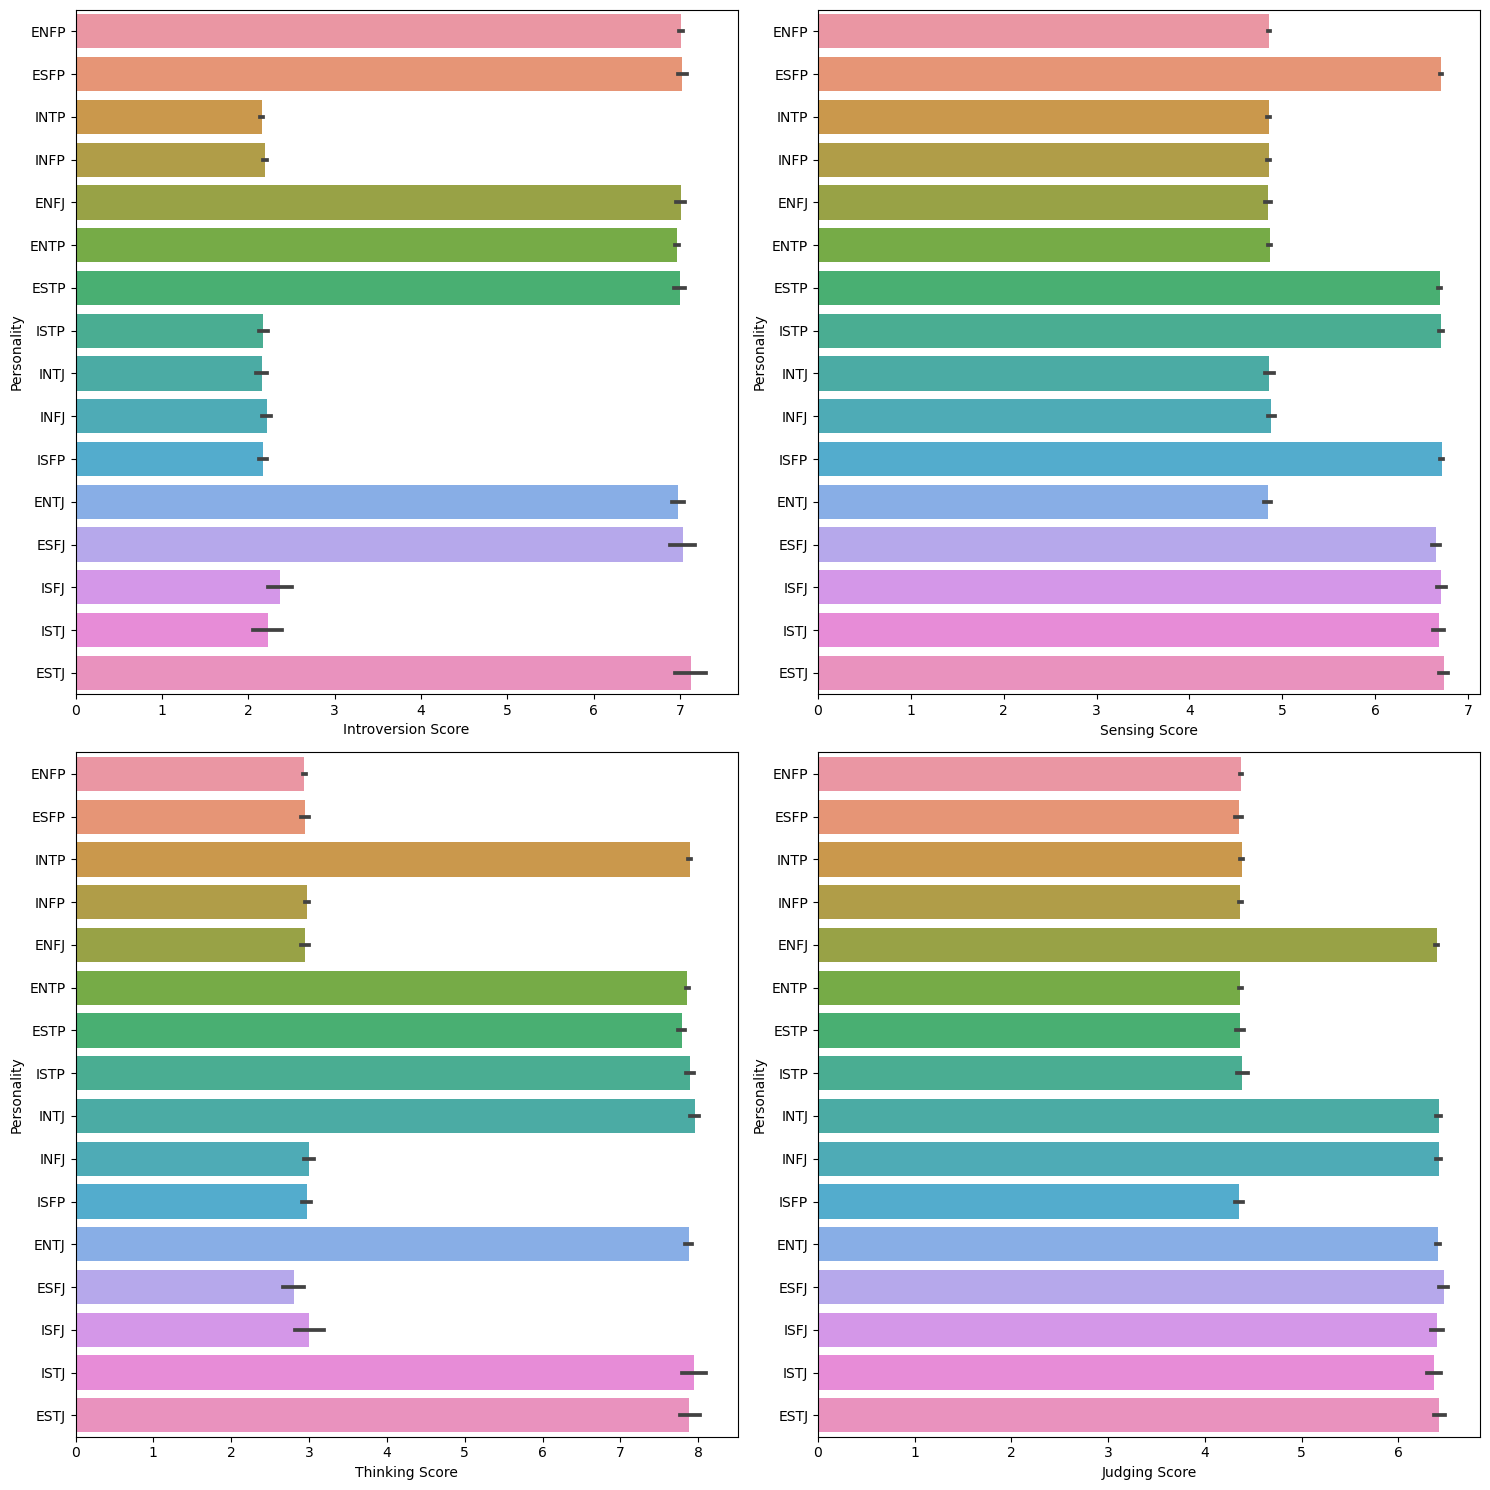

In [12]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.barplot(data=df, y='Personality', x='Introversion Score', estimator='mean',ax=ax[0][0])
sns.barplot(data=df, y='Personality', x='Sensing Score', estimator='mean',ax=ax[0][1])
sns.barplot(data=df, y='Personality', x='Thinking Score', estimator='mean',ax=ax[1][0])
sns.barplot(data=df, y='Personality', x='Judging Score', estimator='mean',ax=ax[1][1])
plt.tight_layout() #–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç —Ä–∞–∑–º–µ—Ä—ã –∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –≤—Å–µ—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≥—Ä–∞—Ñ–∏–∫–∞ –∏ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ—Ç –∏—Ö, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ
plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –≤–∏–¥–Ω–æ, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ –∫–∞–∫–∏–º –∞—Å–ø–µ–∫—Ç–∞–º –∂–∏–∑–Ω–∏ –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç –≤ –∫–∞–∂–¥–æ–º –∏–∑ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö —Ç–∏–ø–∞—Ö –ª–∏—á–Ω–æ—Å—Ç–∏. 

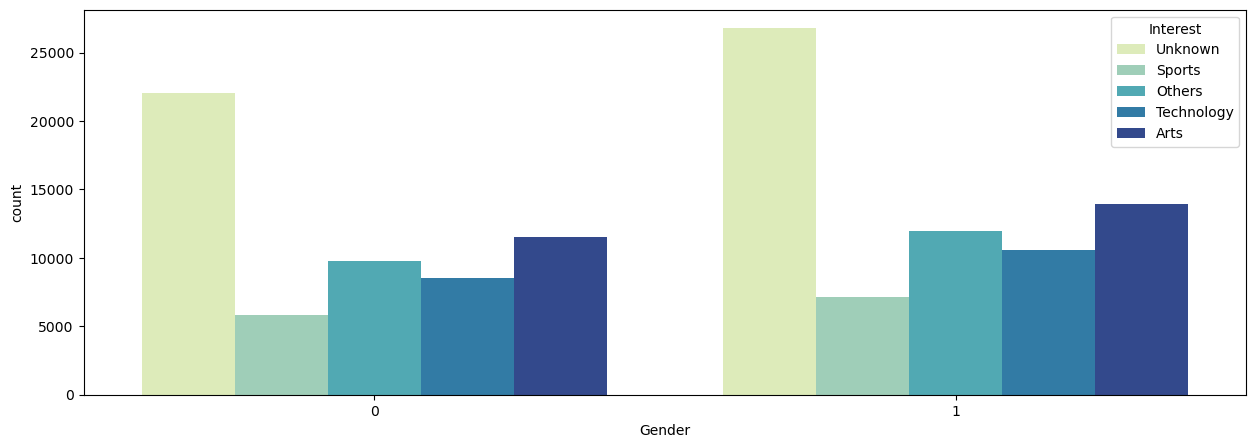

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Gender',hue='Interest',palette='YlGnBu')
plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤. –ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –¥–æ–ª–∏, –ø–æ –∫–æ—Ç–æ—Ä—ã–º —Ä–∞—Å–ø—Ä–µ–¥–ª—è—é—Ç—Å—è —Å—Ñ–µ—Ä—ã –≤–Ω—É—Ç—Ä–∏ –≥–µ–Ω–¥–µ—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã. 

#### –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –æ–ø–∏—à–∏—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ–±–Ω–∞—Ä—É–∂–∏–ª–∏. –ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å?

In [14]:
#–ü–µ—Ä–µ–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –∏—Ö –º–æ–∂–Ω–æ –±—ã–ª–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  int64  
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  int64  
 8   Personality         128061 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 8.8 MB
None


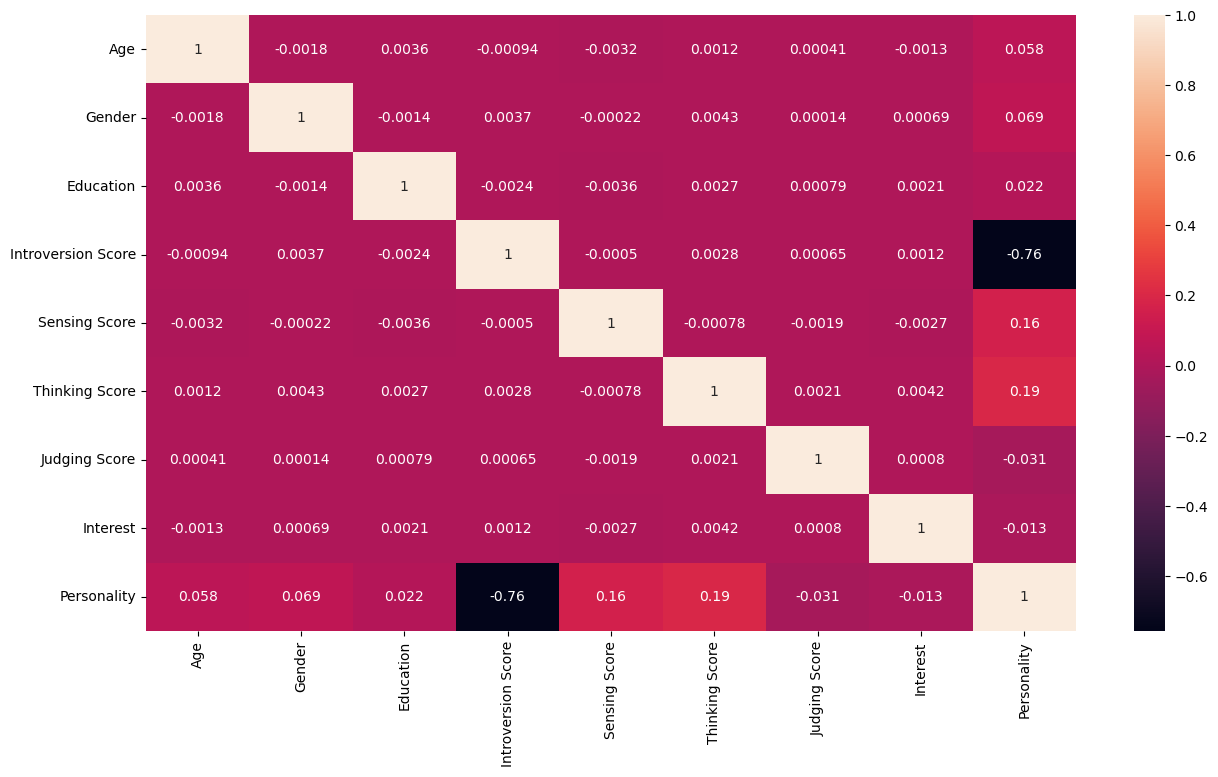

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

–ü–æ —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ, –µ—Å–ª–∏ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å —Ç–∏–ø—ã –ª–∏—á–Ω–æ—Å—Ç–∏ –≤ —á–∏—Å–ª–∞ –æ—Ç 1 –¥–æ 16, –≥–¥–µ –∫–æ–¥–∏—Ä–æ–≤–∫–∞ –±—É–¥–µ—Ç –∏–¥—Ç–∏ –ø–æ –∞–ª—Ñ–∞–≤–∏—Ç—É, —Ç–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∏–Ω—Ç—Ä–æ–≤–µ—Ä—Å–∏–∏ –±—É–¥–µ—Ç –∏–º–µ—Ç—å —Å–∏–ª—å–Ω—É—é –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–º —Ç–∏–ø–∞ –ª–∏—á–Ω–æ—Å—Ç–∏, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –∫–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –æ–±—ä–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ –∞–Ω–∞–ª–∏–∑–∞ –∏–º–µ—é—Ç —Å–ª–∞–±—É—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é. 

–í—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Å–≤—è–∑–∏ –æ–∫–æ–ª–æ 0, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –∑–∞–≤–∏—Å—è—Ç –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞. 

–í–∞–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –º–∞—Ç—Ä–∏—Ü–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ç–∞–∫–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ç–æ–ª—å–∫–æ –ø—Ä–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º –º–µ—Ç–æ–¥–µ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∫–∏.

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≥–∏–ø–æ—Ç–µ–∑ —Å —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç –∏ t-—Ç–µ—Å—Ç. –°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–π—Ç–µ 3 –≥–∏–ø–æ—Ç–µ–∑—ã (–ø–æ –æ–¥–Ω–æ–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∏–ø–∞ —Å—Ç–∞—Ç —Ç–µ—Å—Ç–∞) –ø–æ –≤–∞—à–∏–º –¥–∞–Ω–Ω—ã–º, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç, –æ–¥–Ω–æ–≤—ã–±–æ—Ä–æ—á–Ω–æ–≥–æ –∏ –¥–≤—É—Ö–≤—ã–±–æ—Ä–æ—á–Ω–æ–≥–æ t-—Ç–µ—Å—Ç–∞. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –≥–∏–ø–æ—Ç–µ–∑—ã.–ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å? 

1. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç –ª—é–¥–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ—Ö–æ–¥—è—Ç —Ç–µ—Å—Ç—ã –Ω–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∏–ø–∞ –ª–∏—á–Ω–æ—Å—Ç–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 26 –ª–µ—Ç, —Ç–∫ —ç—Ç–æ  –ø–æ–ø–æ–ª—è—Ä–Ω—ã–π —Ç—Ä–µ–Ω–¥ —Å—Ä–µ–¥–∏ –º–æ–ª–æ–¥–µ–∂–∏ –≤ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç

$$
\begin{aligned}
&H_–æ: Œº=26 \\
&H_–∞: Œº‚â†26
\end{aligned}
$$

In [16]:
#—Å—á–∏—Ç–∞–µ–º p-value
result = stats.ttest_1samp(a=df['Age'],                    # –≤—ã–±–æ—Ä–∫–∞
                           popmean=26,                # –æ–∂–∏–¥–∞–µ–º–æ–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ
                           alternative='two-sided') 
result

TtestResult(statistic=25.453125449758996, pvalue=1.4788678313089754e-142, df=128060)

–ü—Ä–æ–≤–µ—Ä–∏–º –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

In [17]:
print(result.pvalue > 0.1)    #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 10%
print(result.pvalue > 0.05)   #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 5%
print(result.pvalue > 0.01)   #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 1%

False
False
False


–í–∏–¥–∏–º, —á—Ç–æ p-value –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ, —á–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 
$$\begin{aligned} 
Œ± = 0.05
\end{aligned}
$$
—Ç–∞–∫ —á—Ç–æ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ **–æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è**

### –¢–µ—Å—Ç –Ω–∞ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å ùúí2

–¢–µ—Å—Ç –Ω–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–∏—á–Ω–æ—Å—Ç–∏ –ø—Ä–æ—à–ª–æ 128061 —á–µ–ª–æ–≤–µ–∫ (fact). –ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –æ–∂–∏–¥–∞–µ–º–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–¥–∞–≤—à–∏—Ö —Ç–µ—Å—Ç —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å —Ç–µ–º, –∫–æ—Ç–æ—Ä–æ–µ –±—ã–ª–æ —Ä–∞–Ω—å—à–µ –∏ —Å—á–∏—Ç–∞–µ—Ç—Å—è –æ–±—â–µ–ø—Ä–∏–Ω—è—Ç—ã–º

In [18]:
df['Personality'].value_counts()

1     34404
3     24718
9     24711
11    17132
5      4832
0      3883
13     3456
7      3334
8      2919
2      2783
15     2390
10     1920
4       554
6       392
12      371
14      262
Name: Personality, dtype: int64

In [19]:
data = pd.DataFrame()
data.index = ["ENFP", "ENTP", "INFP", "INTP", 'ESFP', 'ENFJ', 'ISFP', 'ESTP', 'INFJ', 'ENTJ', 'ISTP', 'INTJ', 'ESFJ', 'ESTJ', 'ISFJ', 'ISTJ']
data["fact"] = [34404, 24718, 24711, 17132, 4832, 3883, 3456, 3334, 2919, 2783, 2390, 1920, 554, 392, 371, 262]
data["exp_rate"] = [0.080, 0.032, 0.044, 0.033, 0.085, 0.025, 0.088, 0.043, 0.015, 0.018, 0.054, 0.021, 0.122, 0.087, 0.138, 0.115]
data

fact  exp_rate
ENFP  34404     0.080
ENTP  24718     0.032
INFP  24711     0.044
INTP  17132     0.033
ESFP   4832     0.085
ENFJ   3883     0.025
ISFP   3456     0.088
ESTP   3334     0.043
INFJ   2919     0.015
ENTJ   2783     0.018
ISTP   2390     0.054
INTJ   1920     0.021
ESFJ    554     0.122
ESTJ    392     0.087
ISFJ    371     0.138
ISTJ    262     0.115

$ H_0 $ : –ù–∞–±–ª—é–¥–∞–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ–≥–ª–∞—Å—É—é—Ç—Å—è —Å –æ–∂–∏–¥–∞–µ–º–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é

In [20]:
data['exp'] = data["exp_rate"]*(data["fact"].sum())
data

fact  exp_rate        exp
ENFP  34404     0.080  10244.880
ENTP  24718     0.032   4097.952
INFP  24711     0.044   5634.684
INTP  17132     0.033   4226.013
ESFP   4832     0.085  10885.185
ENFJ   3883     0.025   3201.525
ISFP   3456     0.088  11269.368
ESTP   3334     0.043   5506.623
INFJ   2919     0.015   1920.915
ENTJ   2783     0.018   2305.098
ISTP   2390     0.054   6915.294
INTJ   1920     0.021   2689.281
ESFJ    554     0.122  15623.442
ESTJ    392     0.087  11141.307
ISFJ    371     0.138  17672.418
ISTJ    262     0.115  14727.015

In [21]:
result = stats.chisquare(data['fact'], #–Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
                data['exp']) #–æ–∂–∏–¥–∞–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
result

Power_divergenceResult(statistic=334361.03259741724, pvalue=0.0)

#### –í—ã–≤–æ–¥—ã

In [22]:
print(result.pvalue > 0.1)    #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 10%
print(result.pvalue > 0.05)   #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 5%
print(result.pvalue > 0.01)   #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 1%

False
False
False


–ü–æ–ª—É—á–∞–µ–º, —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –∑–Ω–∞—á–∏–º–∞ –Ω–∞ –≤—Å–µ—Ö —É—Ä–æ–≤–Ω—è—Ö –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ **–æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è**

 3. –ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Ç—Å–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ "Thinking Score" –∏ "Sensing Score" 

$$
\begin{aligned}
&H_–æ: Œº_t=Œº_s \\
&H_–∞: Œº_t‚â†Œº_s
\end{aligned}
$$

In [23]:
t_2 = stats.ttest_rel(a = df['Thinking Score'], b = df['Sensing Score'])
t_2

TtestResult(statistic=-10.764577281214043, pvalue=5.195950343428356e-27, df=128060)

### –í—ã–≤–æ–¥—ã

In [30]:
print(result.pvalue > 0.1)    #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 10%
print(result.pvalue > 0.05)   #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 5%
print(result.pvalue > 0.01)   #—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 1%

False
False
False


–ü–æ–ª—É—á–∞–µ–º, —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –∑–Ω–∞—á–∏–º–∞ –Ω–∞ –≤—Å–µ—Ö —É—Ä–æ–≤–Ω—è—Ö –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ **–æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è**

# –ó–∞–¥–∞—á–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ 

–ù–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –≤—ã—Ä–∞–∂–µ–Ω–Ω—É—é –≤ 16 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö. –ü–æ—ç—Ç–æ–º—É –º—ã –±—É–¥–µ–º –ø—Ä–æ–≤–æ–¥–∏—Ç—å –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞. –¢–∞–∫–∂–µ –Ω–∞–º –Ω–∞–¥–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º "–ü–æ–ª" –∏ "Interest"

In [25]:
df_rf = df
df_rf['Gender'] = df['Gender'].apply(lambda x: '1' if x == 'Male' else '0')
def change(x):
    if x == 'Unknown':
        return 0
    elif x == 'Sports':
        return 1
    elif x == 'Others':
        return 2
    elif x == 'Technology':
        return 3
    else:
        return 4
df_rf['Interest'] = df['Interest'].apply(change)

–¢–µ–ø–µ—Ä—å, —á—Ç–æ–±—ã –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã–¥–µ–ª–∏—Ç—å –∏—Å—Å–ª–µ–¥—É—é–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –º—ã –±—É–¥–µ–º –µ–µ –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å

In [26]:
X = df_rf.drop('Personality', axis=1)  
y = df_rf['Personality']
#–¥–µ–ª–∏–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–º –ø—Ä–æ–≤–µ—Ä–∫—É, –∫–∞–∫–æ–π –Ω–∞–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏ —è–≤–ª—è–µ—Ç—Å—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º —Å –ø–æ–º–æ—â—å—é —Ä–µ—à–µ—Ç—á–∞—Ç–æ–≥–æ (Grid Search) –ø–æ–¥—Ö–æ–¥–∞

In [29]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –ø–µ—Ä–µ–±–æ—Ä–∞
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ä–µ—à–µ—Ç—á–∞—Ç–æ–≥–æ –ø–æ–∏—Å–∫–∞
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# –í—ã–≤–æ–¥ –Ω–∞–∏–ª—É—á—à–∏—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ—Ü–µ–Ω–∫–∏
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Best Cross-Validation Score: 0.8349894389163957


–ú—ã –ø–æ–ª—É—á–∏–ª–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏. –¢–µ–ø–µ—Ä—å –ø–µ—Ä–µ–π–¥–µ–º –∫ –µ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—é –∏ –æ–ø–∏—Å–∞–Ω–∏—é.

In [37]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf = 1, max_depth = 10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [38]:
y_pred = model.predict(X_test)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –æ—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞
print(classification_report(y_test, y_pred))

Accuracy: 0.8365673681333697
              precision    recall  f1-score   support

           0       0.93      0.73      0.81       799
           1       0.91      0.84      0.87      6963
           2       0.84      0.74      0.79       531
           3       0.82      0.87      0.84      4989
           4       0.82      0.70      0.76       101
           5       0.87      0.72      0.79       981
           6       0.85      0.71      0.77        78
           7       0.75      0.74      0.75       633
           8       0.84      0.76      0.80       611
           9       0.82      0.87      0.84      4895
          10       0.80      0.74      0.77       362
          11       0.77      0.91      0.83      3415
          12       0.80      0.52      0.63        75
          13       0.78      0.72      0.75       670
          14       0.80      0.77      0.79        48
          15       0.73      0.79      0.76       462

    accuracy                           0.84     256

#### –ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏, —É–∫–∞–∑–∞–Ω–Ω–æ–µ –ø–æ –º–µ—Ç—Ä–∏–∫–µ "accuracy" —Ä–∞–≤–Ω–∞ 0,8366. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, —É –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ 83,6% –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –≤–µ—Ä–Ω–æ.

In [39]:
print(confusion_matrix(y_test, y_pred))

[[ 580   86   42   13    6    0    0    0   62   10    0    0    0    0
     0    0]
 [   0 5820    0  483    0   41    0    6    0  601    0    7    0    5
     0    0]
 [  10    0  394   73    0    0    6    2    4    0   32    9    0    0
     1    0]
 [   0  110    0 4325    0    1    0   40    0   29    0  478    0    0
     0    6]
 [   8    1    0    0   71   12    3    0    2    0    0    0    4    0
     0    0]
 [   0   98    0    8    0  709    0   64    0   15    0    1    0   84
     0    2]
 [   1    0   10    1    0    0   55    6    0    0    1    0    0    0
     3    1]
 [   0    3    0   82    0   15    0  470    0    0    0   10    0    1
     0   52]
 [  25    5    5    1    0    0    0    0  463   73   33    3    3    0
     0    0]
 [   0  246    0   63    0    4    0    3    0 4240    0  308    0   27
     0    4]
 [   0    0   17    3    0    0    0    0    9    0  267   61    1    0
     4    0]
 [   0    1    0  194    0    0    0    4    0   82    1 3105    

–¢–∞–∫–∂–µ –ø–æ–∫–∞–∂–µ–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫, –ø–æ –∫–æ—Ç–æ—Ä–æ–π –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫ —Ä–∞–≤–Ω–æ 5820, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 4,6% –æ—Ç –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–∏ 